In [13]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Set the plot style
sns.set(style="whitegrid")

In [17]:
# Load the dataset
df = pd.read_csv("NY-House-Dataset.csv")  # Make sure the CSV is in your working directory

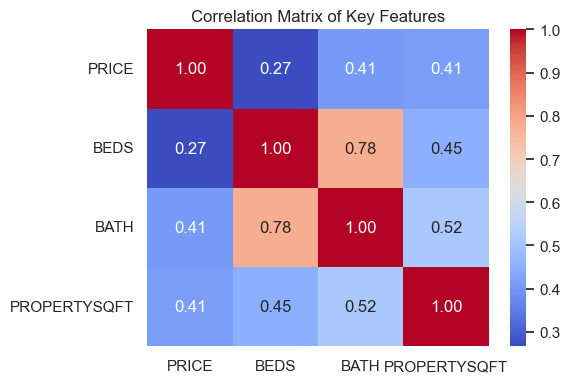

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("NY-House-Dataset.csv")

# Remove top 1% outliers for better clarity
price_threshold = df["PRICE"].quantile(0.99)
df_filtered = df[df["PRICE"] <= price_threshold]

# Select numeric columns for correlation
corr_matrix = df_filtered[["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.tight_layout()
plt.show()

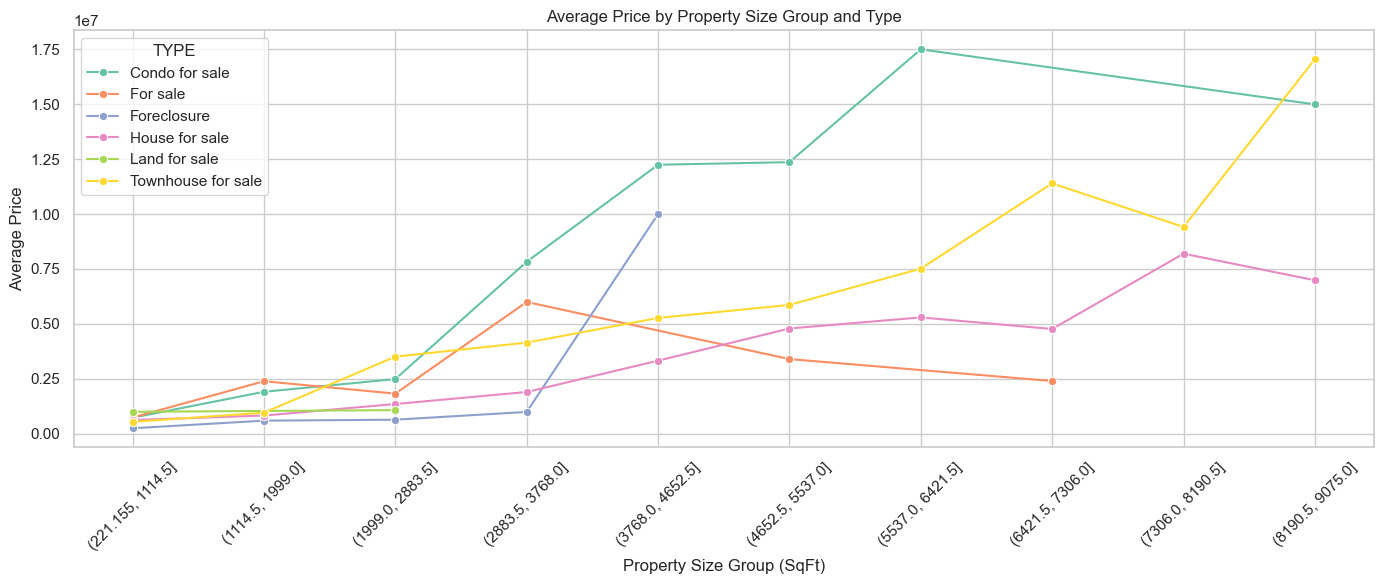

In [53]:
# Filter selected property types
selected_types = [
    "Condo for sale", "House for sale", "Townhouse for sale",
    "For sale", "Land for sale", "Foreclosure"
]

# Remove top 1% outliers for price and property size
price_threshold = df["PRICE"].quantile(0.99)
size_threshold = df["PROPERTYSQFT"].quantile(0.99)
df_clean = df[(df["PRICE"] <= price_threshold) & (df["PROPERTYSQFT"] <= size_threshold)]

# Filter for selected types
df_selected = df_clean[df_clean["TYPE"].isin(selected_types)].copy()

# Fix 1: Use .loc to prevent SettingWithCopyWarning
df_selected.loc[:, 'SizeGroup'] = pd.cut(df_selected['PROPERTYSQFT'], bins=10)

# Fix 2: Set observed=False to prevent FutureWarning
grouped = df_selected.groupby(['SizeGroup', 'TYPE'], observed=False)['PRICE'].mean().reset_index()

# Convert size group bins to string labels for x-axis
grouped['SizeGroupLabel'] = grouped['SizeGroup'].astype(str)

# Consistent color palette
palette = sns.color_palette("Set2", n_colors=len(selected_types))

# Plot line graph
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=grouped,
    x='SizeGroupLabel',
    y='PRICE',
    hue='TYPE',
    marker='o',
    palette=palette
)

plt.title("Average Price by Property Size Group and Type")
plt.xlabel("Property Size Group (SqFt)")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

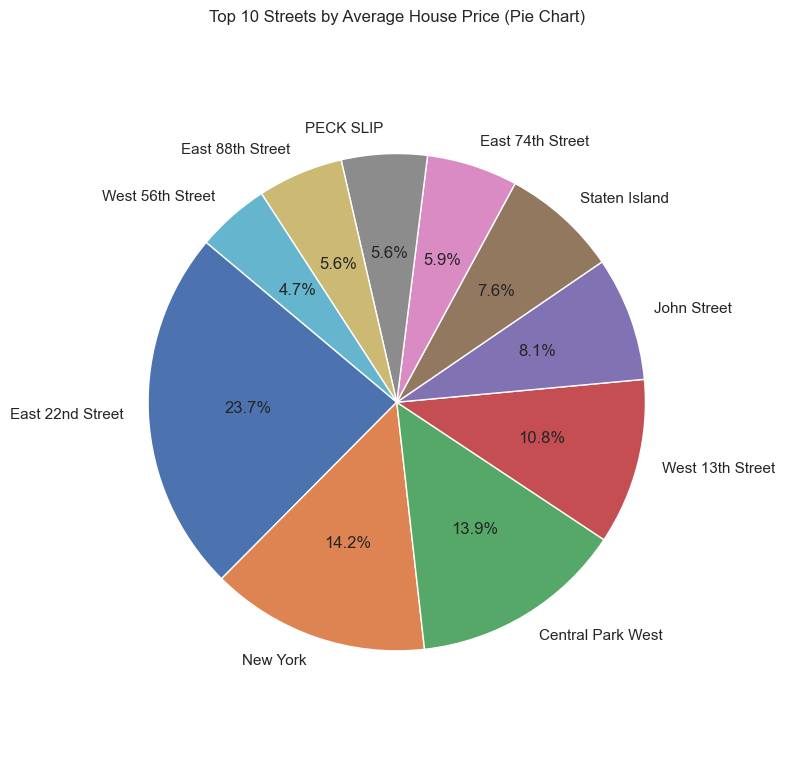

In [85]:
# Calculate top 10 streets by average house price
top_streets = df.groupby("STREET_NAME")["PRICE"].mean().sort_values(ascending=False).head(10)

# Plot as pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_streets.values,
        labels=top_streets.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title("Top 10 Streets by Average House Price (Pie Chart)")
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.tight_layout()
plt.show()

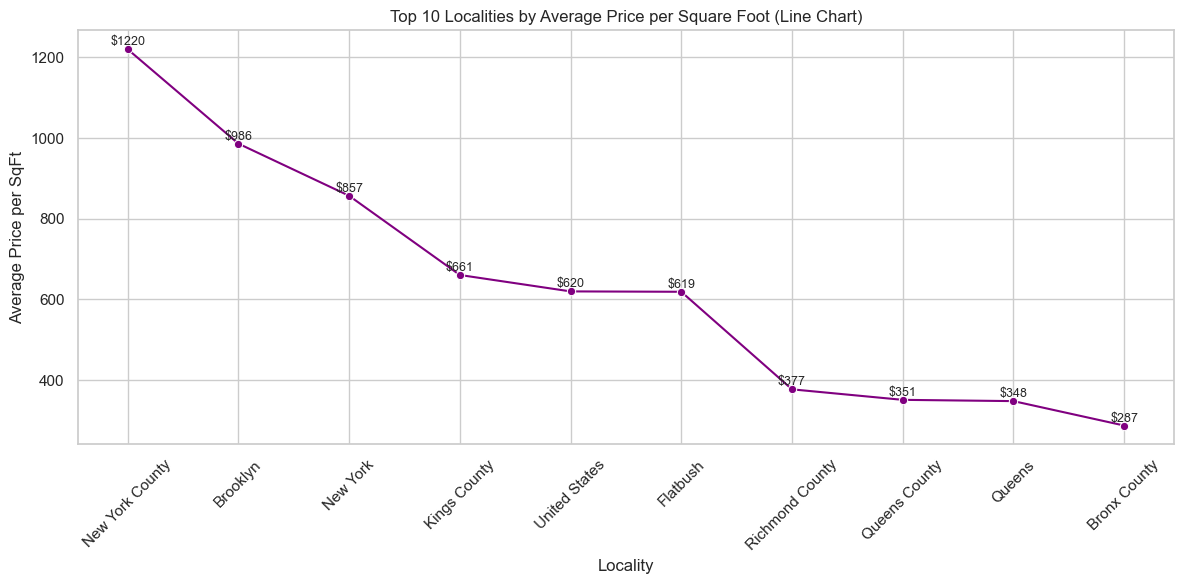

In [95]:
# Calculate price per square foot
df["PricePerSqFt"] = df["PRICE"] / df["PROPERTYSQFT"]

# Get top 10 localities by average PricePerSqFt
top_ppsf = df.groupby("LOCALITY")["PricePerSqFt"].mean().sort_values(ascending=False).head(10).reset_index()

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
line = sns.lineplot(x="LOCALITY", y="PricePerSqFt", data=top_ppsf, marker='o', color='purple')

# Add data labels
for i, row in top_ppsf.iterrows():
    plt.text(i, row["PricePerSqFt"] + 10, f"${row['PricePerSqFt']:.0f}", ha='center', fontsize=9)

# Final formatting
plt.title("Top 10 Localities by Average Price per Square Foot (Line Chart)")
plt.ylabel("Average Price per SqFt")
plt.xlabel("Locality")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

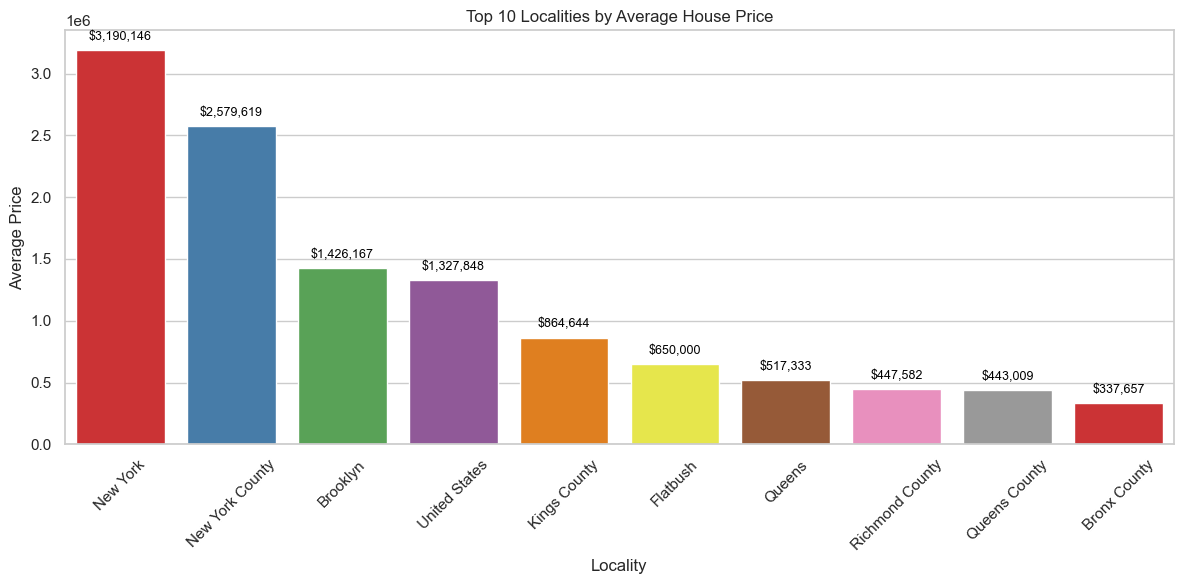

In [87]:
# Calculate top 10 localities by average house price
top_localities = df.groupby("LOCALITY")["PRICE"].mean().sort_values(ascending=False).head(10).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Create the barplot with Set1 palette
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=top_localities,
    x="LOCALITY",
    y="PRICE",
    hue="LOCALITY",
    palette="Set1",
    dodge=False
)

# Add value labels on top of each bar
for p in bar.patches:
    height = p.get_height()
    bar.annotate(
        f'${height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom'
        fontsize=9, color='black', xytext=(0, 5),
        textcoords='offset points'
    )

# Final plot formatting
plt.title("Top 10 Localities by Average House Price")
plt.xlabel("Locality")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

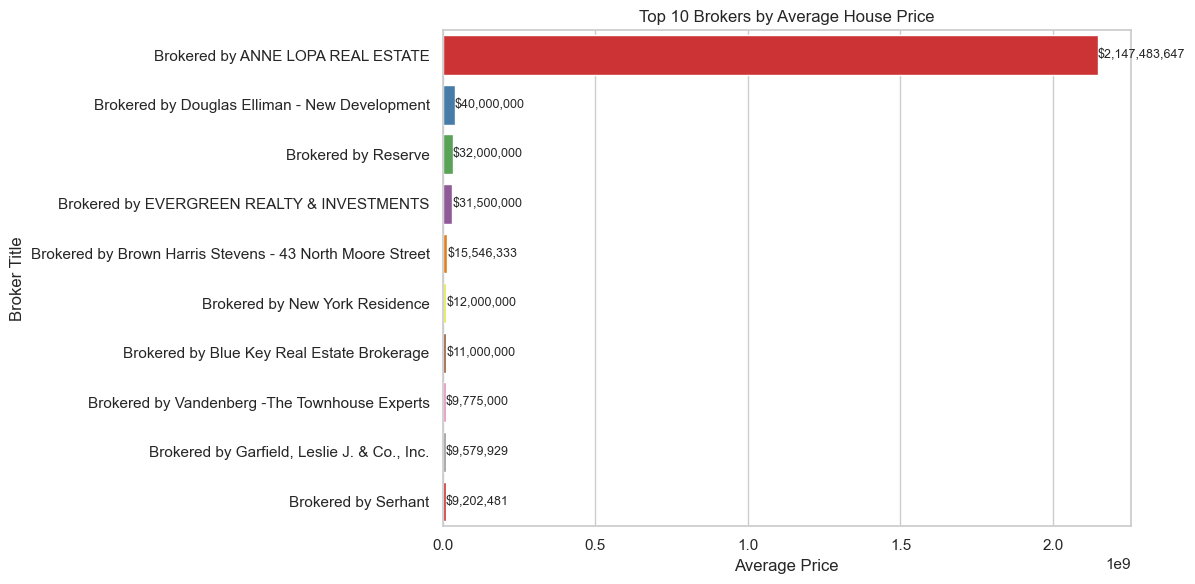

In [91]:
# Get top 10 brokers by average house price
top_brokers = df.groupby("BROKERTITLE")["PRICE"].mean().sort_values(ascending=False).head(10).reset_index()

# Set Seaborn style
sns.set(style="whitegrid")

# Plot with Set2 palette and no legend
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=top_brokers,
    y="BROKERTITLE",
    x="PRICE",
    hue="BROKERTITLE",
    palette="Set1",
    legend=False
)

# Add value labels to each bar
for i, v in enumerate(top_brokers["PRICE"]):
    plt.text(v + 10000, i, f'${v:,.0f}', va='center', fontsize=9)

# Final styling
plt.title("Top 10 Brokers by Average House Price")
plt.xlabel("Average Price")
plt.ylabel("Broker Title")
plt.tight_layout()
plt.show()